# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Abdelrahman Nassar 

ID: 46-8997

Tutorial: 03 

---

Name: Abdelrahman Ghitany 

ID: 46-19133

Tutorial: 03 

---

Name:

ID:

Tutorial:

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [ ]:
df.info()

df.describe(include='all')

df.isnull().sum()

df.head()



df['make'].unique()

df['model'].unique()

df['trim'].unique()

df['body'].unique()

df['transmission'].unique()

df['state'].unique()

df['color'].unique()

df['interior'].unique()

df['seller'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 5.7+ MB


array(['the hertz corporation', 'award auto sales and leasing inc',
       'lexus financial services', ..., 'bmw of fresno',
       'my mint car corp', 'carter federal credit union'], dtype=object)

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [ ]:

#Replacing Numeric Values with Correct Data Type

df['mmr'] = df['mmr'].str.replace('$','')

df['mmr'] = df['mmr'].str.replace(' ','')

df['mmr'] = df['mmr'].astype(float)

df['sellingprice'] = df['sellingprice'].str.replace('$','')

df['sellingprice'] = df['sellingprice'].str.replace(' ','')

df['sellingprice'] = df['sellingprice'].astype(float)

df['odometer'] = df['odometer'].str.replace('mi','')

df['odometer'] = df['odometer'].astype(float)



#Resolving Inconsistencies in Columns



df['make'] = df['make'].replace("smart", "Smart")

df['make'] = df['make'].replace("FIAT", "Fiat")

df['make'] = df['make'].replace("MINI", "Mini")



df['transmission'] = df['transmission'].str.capitalize()



df['state'] = df['state'].str.upper()



df['color'] = df['color'].replace('—', np.nan)

df['color'] = df['color'].str.capitalize()



df['interior'] = df['interior'].replace('—', np.nan)

df['interior'] = df['interior'].str.capitalize()






#Reducing Body Categories



df['body'] = df['body'].replace(['sedan', 'G Sedan', 'g sedan'], 'Sedan')

df['body'] = df['body'].replace(['coupe', 'G Coupe', 'g coupe','Genesis Coupe', 'genesis coupe', 'Koup', 'Elantra Coupe', 'CTS Coupe', 'CTS-V Coupe', 'Q60 Coupe', 'cts coupe'], 'Coupe')

df['body'] = df['body'].replace(['convertible', 'G Convertible', 'Beetle Convertible', 'G37 Convertible', 'Q60 Convertible', 'GranTurismo Convertible', 'beetle convertible', 'g convertible', 'granturismo convertible'], 'Convertible')

df['body'] = df['body'].replace('hatchback', 'Hatchback')

df['body'] = df['body'].replace('suv', 'SUV')

df['body'] = df['body'].replace(['E-Series Van', 'van', 'minivan', 'e-series van', 'promaster cargo van', 'Promaster Cargo Van', 'Transit Van', 'Van'], 'Minivan')

df['body'] = df['body'].replace(['wagon', 'CTS Wagon', 'TSX Sport Wagon', 'tsx sport wagon'], 'Wagon')

df['body'] = df['body'].replace(['Crew Cab', 'Regular Cab', 'Double Cab','Extended Cab', 'SuperCab', 'king cab', 'King Cab', 'extended cab', 'quad cab', 'supercab', 'Quad Cab', 'crew cab', 'CrewMax Cab', 'double cab', 'Club Cab', 'Access Cab', 'Cab Plus 4', 'crewmax cab', 'access cab', 'Mega Cab', 'regular cab', 'mega cab', 'regular-cab', 'Xtracab', 'xtracab' ], 'Pickup Truck')

df.drop(df[df['body'] == 'SuperCrew'].index,inplace = True)

df.drop(df[df['body'] == 'supercrew'].index,inplace = True)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if __name__ == '__main__':


## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

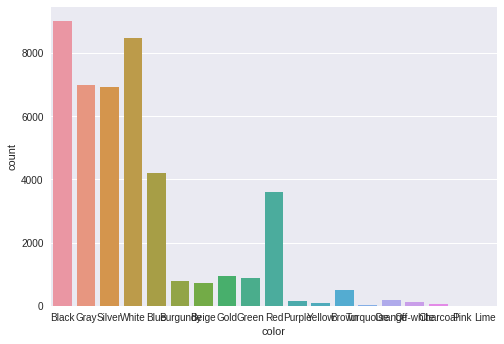

In [ ]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

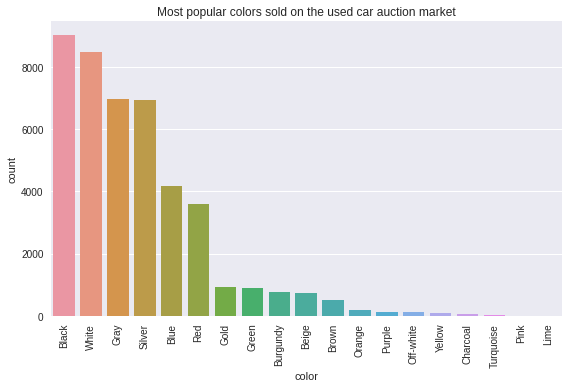

In [ ]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

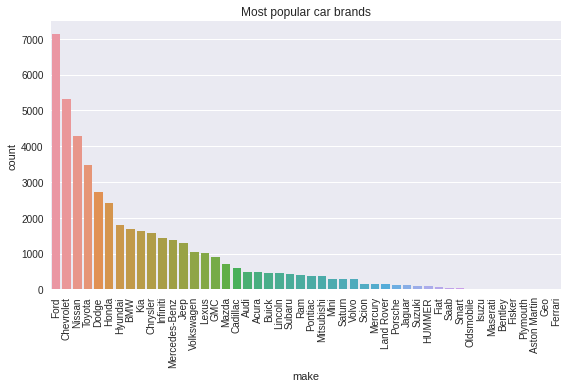

In [ ]:
#df['make'].value_counts()

large_to_small = df.groupby('make').size().sort_values(ascending=False)
sns.countplot(x='make', data=df, order=large_to_small.index).set(title='Most popular car brands')
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q1**: *Ford, Chevrolet, Nissan*

**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

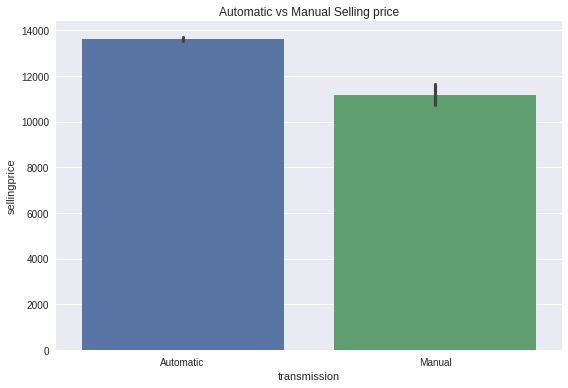

In [ ]:
sns.barplot(data=df, x='transmission', y='sellingprice').set(title='Automatic vs Manual Selling price')
plt.tight_layout()

**Answer for Q2**: *Yes*

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

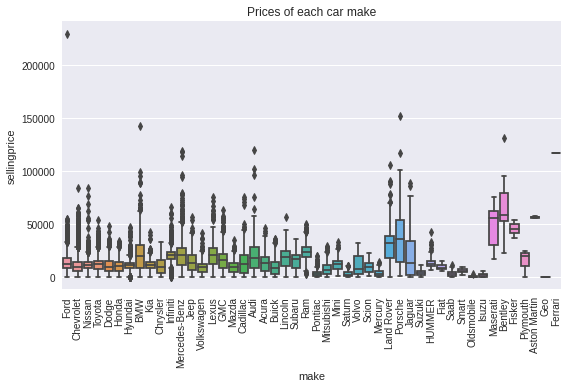

In [ ]:
sns.boxplot(data=df, x='make', y='sellingprice', order=large_to_small.index).set(title='Prices of each car make')
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q3**: **Widest distribution**: Porsche, Jaguar
                   **Most expensive**: Ford, Porsche 

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

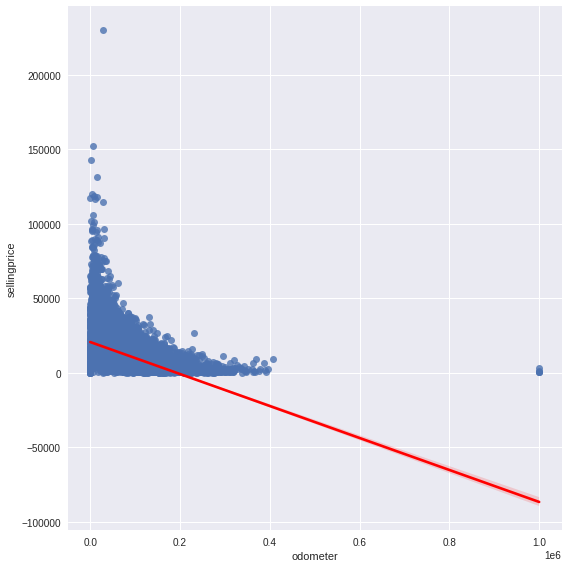

In [ ]:
corr = df.corr()
corr
#line of best fit
sns.lmplot(x='odometer', y='sellingprice', data=df, palette='magma', height=8, line_kws={'color': 'red'});


**Answer for Q4**: -0.581529

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

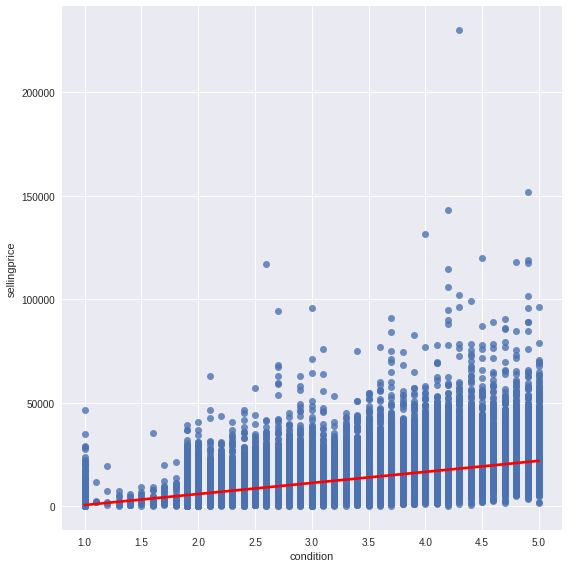

In [ ]:
corr = df.corr()
corr
#line of best fit
sns.lmplot(x='condition', y='sellingprice', data=df, palette='magma', height=8, line_kws={'color': 'red'});


**Answer for Q5**: 0.525948

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

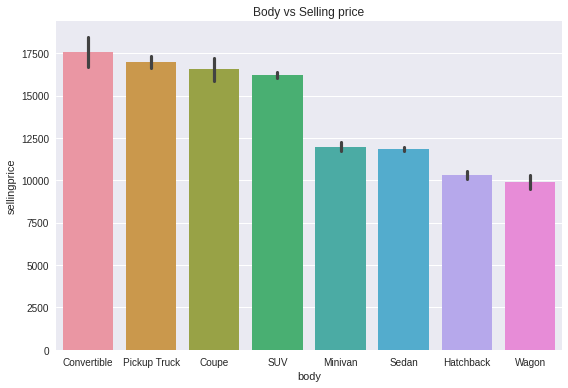

In [ ]:
sns.barplot(data=df, x='body', y='sellingprice', order = df.groupby(["body"])["sellingprice"].mean().sort_values(ascending=False).index).set(title='Body vs Selling price')
plt.tight_layout()


**Answer for Q6**: Yes, ***Most expensive - Least expensive ***: (Convertible, Pickup truck, Coupe, SUV, Minivan, Sedan, Hatchback, Wagon)

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [ ]:

#Copy data frame to preserve original state
df_encode = df.copy()  

#Dropping attributes
df_encode= df_encode.drop(['seller','saledate','vin','state','interior','trim','model','mmr'],axis=1)

#One hot encoding
categorical_columns = ['transmission','color']
df_encode = pd.get_dummies(data=df,
                           columns=categorical_columns,
                           drop_first=True,
                           dtype='int8')     
#Label encoding 
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df_encode['make']=label_encoder.fit_transform(df['make'])
label_encoder=preprocessing.LabelEncoder()
df_encode['body']=label_encoder.fit_transform(df['body'])
label_encoder=preprocessing.LabelEncoder()
df_encode['year']=label_encoder.fit_transform(df['year'])

#Normalization // Numerical
numerical_columns = ['odometer']
df_encode[numerical_columns] = ( 
    df_encode[numerical_columns] - df_encode[numerical_columns].min()  
) /( 
    df_encode[numerical_columns].max() - df_encode[numerical_columns].min()
)

df_encode.head()

#Train-Test
from sklearn.model_selection import train_test_split

x = df_encode.drop(['sellingprice'],axis=1) # Independent variable
y = df_encode['sellingprice'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 36670
Testing dataset size: 9168


## Modelling

_Apply the linear regression model below._

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train , y_train);

parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

,parameter,column,theta_value
0,theta_0,y-intersect,-86.808916
1,theta_1,year,618.394879
2,theta_2,make,-31.274106
3,theta_3,body,-669.738692
4,theta_4,condition,2469.236621
5,theta_5,odometer,-46083.303984
6,theta_6,transmission_Manual,-1133.718355
7,theta_7,color_Black,1248.673108
8,theta_8,color_Blue,-1313.384807
9,theta_9,color_Brown,24.879261


## Model Evaluation

_Evaluate the model you applied._

In [ ]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

# Evaluation
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)

# R_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

from sklearn.metrics import mean_absolute_percentage_error, median_absolute_error, mean_squared_log_error
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = median_absolute_error(y_test, y_pred)

# Due to the model erroneously predicting negative values for the insurance charges, MSLE cannot be used (log of negative numbers is invalid)
# Such a discovery, while accidental, provides another hint that the predictions needs to be further improved before model deployment,
# as negative values should not be output for insurance charges predictions

# msle = mean_squared_log_error(y_test, y_pred)


print('The mean absolute percentage error (MAPE) is: ', mape)
print('The median absolute error (MAE) is: ', mae)

# print('The mean squared log error (MSLE) is: ', msle)

The root mean square error (RMSE) is:  7125.044451091754
R^2 obtained is: 0.4481752387816641
The mean absolute percentage error (MAPE) is:  0.6525139734643512
The median absolute error (MAE) is:  3644.818563058967


## Model Validation (Optional)

_Check if the model you applied meets the necessary assumptions for the chosen model._

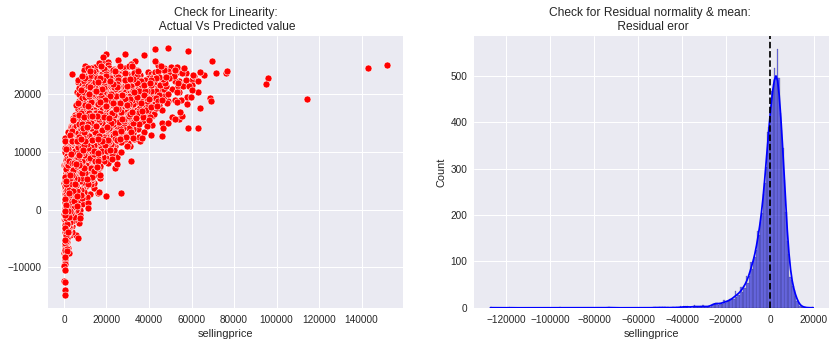

In [ ]:
# Checking for linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x= y_test, y= y_pred, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Checking for residual normality & mean
ax = f.add_subplot(122)
sns.histplot(x=(y_pred - y_test), ax=ax, color='b', kde=True)
ax.axvline((y_pred - y_pred).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: Firstly, by observing the RSME we can instantly tell that the model needs a lot of work since the RSME value is incredibly high (7125.04). In addition to that, the R2 value indicates that almost half of the variance (44.82%) has been explained and is predictable from the independent variables. This leaves us with more than half of the varince unexplained. So in conclusion, our model still needs a lot of accuracy improvement for it to be used reliably.